# TESTANDO O STREAMLIT PARA VISUALIZAÇÃO DOS DADOS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt #por algum motivo não funcionou com o seaborn, então vamos de matplot
import streamlit as st

In [2]:
df = pd.read_csv('sph4_out.csv', sep= ',')

print(df.columns)

Index(['% year', ' month', ' day', ' hour', ' minute', ' second (GMT/UTC)',
       ' water level (meters)'],
      dtype='object')


In [3]:
df.tail(10)

,% year,month,day,hour,minute,second (GMT/UTC),water level (meters)
51837,2024,9,25,22,10,0,1.132
51838,2024,9,25,22,20,0,1.128
51839,2024,9,25,22,30,0,1.125
51840,2024,9,25,22,40,0,1.121
51841,2024,9,25,22,50,0,1.119
51842,2024,9,25,23,0,0,1.117
51843,2024,9,25,23,10,0,1.115
51844,2024,9,25,23,20,0,1.114
51845,2024,9,25,23,30,0,1.113
51846,2024,9,25,23,40,0,1.113


In [6]:
# Função para carregar os dados

@st.cache_data  # Cache para evitar recarregamento dos dados em cada interação
def load_data():
    # Carregar os dados (ajustando o necessário)

    df = pd.read_csv('sph4_out.csv', sep= ',')

    df.rename(columns= {'% year' : 'year', ' month' : 'month', ' day' : 'day', ' hour' : 'hour', ' minute' : 'minute', ' second (GMT/UTC)' : 'second',
                        ' water level (meters)' : 'water_level(m)'}, inplace= True)

    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute', 'second']])

    return df

2024-09-25 22:48:44.683 No runtime found, using MemoryCacheStorageManager


2024-09-25 22:51:02.233 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-25 22:51:02.234 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-25 22:51:02.235 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-25 22:51:02.235 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-25 22:51:02.236 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-25 22:51:02.238 No runtime found, using MemoryCacheStorageManager
2024-09-25 22:51:02.296 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-25 22:51:02.297 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-25 22:51:02.298 Thread 'MainThread':

DeltaGenerator()

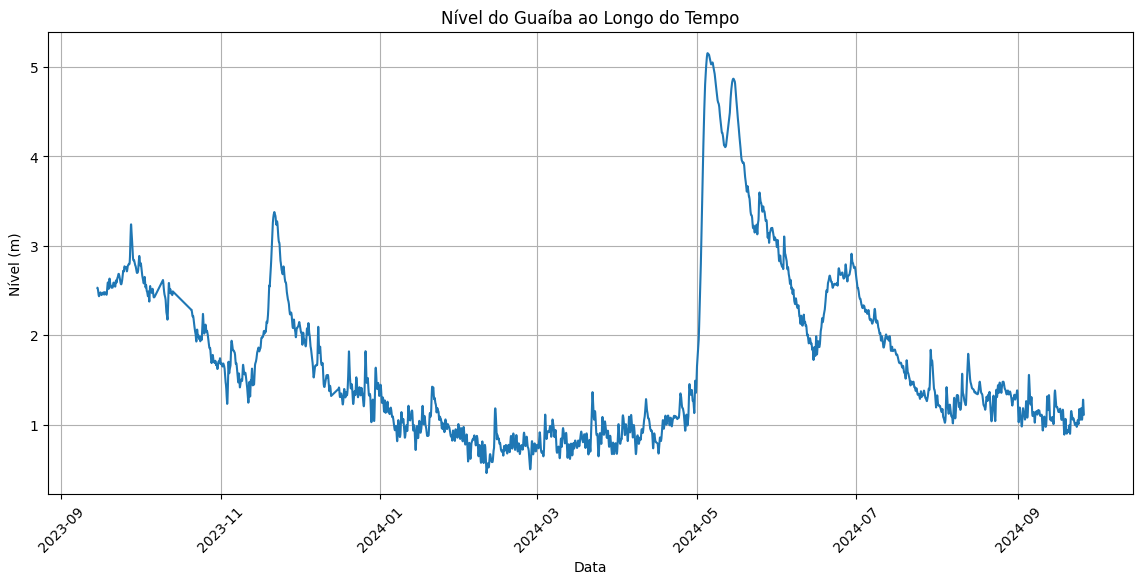

In [7]:
st.title("Monitoramento do Nível do Guaíba")

data = load_data()

st.write("Dados de Nível:")
st.dataframe(data[['datetime', 'water_level(m)']])

# Plot
st.write("Gráfico do Nível de Água ao Longo do Tempo:")
fig, ax = plt.subplots(figsize= (14, 6))
ax.plot(data['datetime'], data['water_level(m)'], linestyle= '-')
ax.set_xlabel('Data')
ax.set_ylabel('Nível (m)')
ax.set_title('Nível do Guaíba ao Longo do Tempo')
plt.xticks(rotation= 45)
plt.grid(True)

# Gráfico no Streamlit
st.pyplot(fig)